# Analysis 5: Netflix Analysis
---
Ideas principales de [DataScience for Business](https://www.youtube.com/watch?v=nj3XnAAGG6E)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
sns.set_theme()

In [40]:
netflix = pd.read_csv("./archive/NetflixViewingHistoryDany.csv")
netflix.head(20)

,Title,Date
0,El juego del calamar: Temporada 1: Gganbu,13/10/21
1,Las ventajas de ser invisible,11/10/21
2,El juego del calamar: Temporada 1: Un mundo justo,11/10/21
3,El juego del calamar: Temporada 1: No abandone...,11/10/21
4,El juego del calamar: Temporada 1: El hombre d...,10/10/21
5,Shrek: Para siempre el capítulo final,08/10/21
6,Shrek 2,08/10/21
7,Anatomía según Grey: Temporada 17: Sigo en pie,07/10/21
8,Anatomía según Grey: Temporada 17: Tradición,06/10/21
9,Anatomía según Grey: Temporada 17: Alza la vista,05/10/21


In [6]:
print(netflix.shape)
netflix.info()

(2769, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   2769 non-null   object
 1   Date    2769 non-null   object
dtypes: object(2)
memory usage: 43.4+ KB


Notamos dos cosas interesantes, pareciera que las series están separadas por dos puntos, empezando por título, luego temporada y al final el nombre del capítulo, mientras que las películas solo tienen el nombre de la película. Además podemos notar que la fecha aún no es del tipo date.

In [41]:
separacion = netflix["Title"].str.split(pat=':', expand=False).to_frame()
separacion.head()

,Title
0,"[El juego del calamar, Temporada 1, Gganbu]"
1,[Las ventajas de ser invisible]
2,"[El juego del calamar, Temporada 1, Un mundo..."
3,"[El juego del calamar, Temporada 1, No aband..."
4,"[El juego del calamar, Temporada 1, El hombr..."


In [42]:
separacion["num_partes"] = separacion["Title"].apply(len)
separacion.head()

,Title,num_partes
0,"[El juego del calamar, Temporada 1, Gganbu]",3
1,[Las ventajas de ser invisible],1
2,"[El juego del calamar, Temporada 1, Un mundo...",3
3,"[El juego del calamar, Temporada 1, No aband...",3
4,"[El juego del calamar, Temporada 1, El hombr...",3


In [43]:
separacion["num_partes"].value_counts()

3    2235
4     264
1     180
2      73
5      12
6       5
Name: num_partes, dtype: int64

In [44]:
separacion.loc[separacion["num_partes"] == 1].head(10)

,Title,num_partes
1,[Las ventajas de ser invisible],1
6,[Shrek 2],1
30,[Llámame por tu nombre],1
48,[El hombre araña],1
69,[La llamada],1
80,[El stand de los besos 3],1
149,[Action Point],1
161,[Cómo entrenar a tu dragón 3],1
172,[Kung Fu Panda 3],1
178,[Cuestión de tiempo],1


In [45]:
separacion.loc[separacion["num_partes"] == 2]

,Title,num_partes
5,"[Shrek, Para siempre el capítulo final]",2
10,"[8 Mile, Calle de las ilusiones]",2
31,"[La calle del terror (Parte 3), 1666]",2
32,"[La calle del terror (Parte 2), 1978]",2
33,"[La calle del terror (Parte 1), 1994]",2
...,...,...
2501,"[¿Por qué a mí?, La charla]",2
2537,"[Herbie, A Toda Marcha]",2
2709,"[Katy Perry, La película - Part of Me]",2
2752,"[Alice Al Revés, La Pelicula]",2


Parece ser que las partes con longitud 1 y 2 son únicamente de películas

In [46]:
separacion.loc[separacion["num_partes"] == 3].head(10)

,Title,num_partes
0,"[El juego del calamar, Temporada 1, Gganbu]",3
2,"[El juego del calamar, Temporada 1, Un mundo...",3
3,"[El juego del calamar, Temporada 1, No aband...",3
4,"[El juego del calamar, Temporada 1, El hombr...",3
7,"[Anatomía según Grey, Temporada 17, Sigo en ...",3
8,"[Anatomía según Grey, Temporada 17, Tradición]",3
9,"[Anatomía según Grey, Temporada 17, Alza la ...",3
11,"[Anatomía según Grey, Temporada 8, Que suced...",3
12,"[Anatomía según Grey, Temporada 17, Mejor qu...",3
13,"[Anatomía según Grey, Temporada 17, Síntoma ...",3


In [47]:
separacion.loc[separacion["num_partes"] == 4]

,Title,num_partes
27,"[Élite historias breves, Guzmán Caye Rebe, T...",4
28,"[Élite historias breves, Guzmán Caye Rebe, T...",4
29,"[Élite historias breves, Guzmán Caye Rebe, T...",4
110,"[Élite historias breves, Omar Ander Alexis, ...",4
111,"[Élite historias breves, Omar Ander Alexis, ...",4
...,...,...
2728,"[Jessie, Temporada 2, La gran oportunidad de...",4
2757,"[H2O, Sirenas del mar, Temporada 1, La capt...",4
2758,"[H2O, Sirenas del mar, Temporada 1, Fiesta ...",4
2760,"[H2O, Sirenas del mar, Temporada 1, Metamor...",4


Mientras que para valores mayores a 2 parecieran ser para series

In [48]:
separacion["tipo"] = np.where(separacion["num_partes"] < 3, "pelicula", "serie")
separacion.head()

,Title,num_partes,tipo
0,"[El juego del calamar, Temporada 1, Gganbu]",3,serie
1,[Las ventajas de ser invisible],1,pelicula
2,"[El juego del calamar, Temporada 1, Un mundo...",3,serie
3,"[El juego del calamar, Temporada 1, No aband...",3,serie
4,"[El juego del calamar, Temporada 1, El hombr...",3,serie


In [49]:
netflix = pd.concat([netflix, separacion["tipo"]], axis=1)
netflix.head()

,Title,Date,tipo
0,El juego del calamar: Temporada 1: Gganbu,13/10/21,serie
1,Las ventajas de ser invisible,11/10/21,pelicula
2,El juego del calamar: Temporada 1: Un mundo justo,11/10/21,serie
3,El juego del calamar: Temporada 1: No abandone...,11/10/21,serie
4,El juego del calamar: Temporada 1: El hombre d...,10/10/21,serie


In [50]:
separacion = netflix["Title"].str.split(pat=':', expand=True)
separacion.columns=['nivel1', 'nivel2', 'nivel3', 'nivel4', 'nivel5', 'nivel6']
separacion[20:40]

,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6
20,Anatomía según Grey,Temporada 17,Lucha contra el poder,None,None,None
21,Anatomía según Grey,Temporada 17,Nunca caminarás sin compañía,None,None,None
22,Anatomía según Grey,Temporada 17,Mi final feliz,None,None,None
23,Anatomía según Grey,Temporada 17,El centro colapsará,None,None,None
24,Anatomía según Grey,Temporada 17,Todas las fiestas del mañana,None,None,None
25,El juego del calamar,Temporada 1,Infierno,None,None,None
26,El juego del calamar,Temporada 1,"Luz roja, luz verde",None,None,None
27,Élite historias breves,Guzmán Caye Rebe,Temporada 1,Parte 3,None,None
28,Élite historias breves,Guzmán Caye Rebe,Temporada 1,Parte 2,None,None
29,Élite historias breves,Guzmán Caye Rebe,Temporada 1,Parte 1,None,None


In [51]:
netflix = pd.concat([netflix, separacion], axis=1)
netflix[20:40]

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6
20,Anatomía según Grey: Temporada 17: Lucha contr...,02/10/21,serie,Anatomía según Grey,Temporada 17,Lucha contra el poder,None,None,None
21,Anatomía según Grey: Temporada 17: Nunca camin...,02/10/21,serie,Anatomía según Grey,Temporada 17,Nunca caminarás sin compañía,None,None,None
22,Anatomía según Grey: Temporada 17: Mi final feliz,02/10/21,serie,Anatomía según Grey,Temporada 17,Mi final feliz,None,None,None
23,Anatomía según Grey: Temporada 17: El centro c...,02/10/21,serie,Anatomía según Grey,Temporada 17,El centro colapsará,None,None,None
24,Anatomía según Grey: Temporada 17: Todas las f...,01/10/21,serie,Anatomía según Grey,Temporada 17,Todas las fiestas del mañana,None,None,None
25,El juego del calamar: Temporada 1: Infierno,26/09/21,serie,El juego del calamar,Temporada 1,Infierno,None,None,None
26,"El juego del calamar: Temporada 1: Luz roja, l...",26/09/21,serie,El juego del calamar,Temporada 1,"Luz roja, luz verde",None,None,None
27,Élite historias breves: Guzmán Caye Rebe: Temp...,26/09/21,serie,Élite historias breves,Guzmán Caye Rebe,Temporada 1,Parte 3,None,None
28,Élite historias breves: Guzmán Caye Rebe: Temp...,26/09/21,serie,Élite historias breves,Guzmán Caye Rebe,Temporada 1,Parte 2,None,None
29,Élite historias breves: Guzmán Caye Rebe: Temp...,26/09/21,serie,Élite historias breves,Guzmán Caye Rebe,Temporada 1,Parte 1,None,None


In [52]:
netflix["Fecha"] = pd.to_datetime(netflix["Date"])
netflix.drop(columns = "Date", inplace = True)
netflix.set_index("Fecha", inplace=True)
netflix.head()

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6
Fecha,,,,,,,,
2021-10-13,El juego del calamar: Temporada 1: Gganbu,serie,El juego del calamar,Temporada 1,Gganbu,None,None,None
2021-11-10,Las ventajas de ser invisible,pelicula,Las ventajas de ser invisible,None,None,None,None,None
2021-11-10,El juego del calamar: Temporada 1: Un mundo justo,serie,El juego del calamar,Temporada 1,Un mundo justo,None,None,None
2021-11-10,El juego del calamar: Temporada 1: No abandone...,serie,El juego del calamar,Temporada 1,No abandones el equipo,None,None,None
2021-10-10,El juego del calamar: Temporada 1: El hombre d...,serie,El juego del calamar,Temporada 1,El hombre del paraguas,None,None,None


In [53]:
def atributos_fecha(data):
  data['anio'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()

In [55]:
atributos_fecha(netflix)

In [56]:
netflix.head()

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,anio,mes,dia_mes,dia_semana
Fecha,,,,,,,,,,,,
2021-10-13,El juego del calamar: Temporada 1: Gganbu,serie,El juego del calamar,Temporada 1,Gganbu,None,None,None,2021,October,13,Wednesday
2021-11-10,Las ventajas de ser invisible,pelicula,Las ventajas de ser invisible,None,None,None,None,None,2021,November,10,Wednesday
2021-11-10,El juego del calamar: Temporada 1: Un mundo justo,serie,El juego del calamar,Temporada 1,Un mundo justo,None,None,None,2021,November,10,Wednesday
2021-11-10,El juego del calamar: Temporada 1: No abandone...,serie,El juego del calamar,Temporada 1,No abandones el equipo,None,None,None,2021,November,10,Wednesday
2021-10-10,El juego del calamar: Temporada 1: El hombre d...,serie,El juego del calamar,Temporada 1,El hombre del paraguas,None,None,None,2021,October,10,Sunday


In [57]:
hoy = pd.Timestamp(date.today())
primer_dia = netflix.index.min()

tiempo = hoy - primer_dia

print('Llevas {} dias con Netflix'.format(tiempo.days))

Llevas 2439 dias con Netflix


In [60]:
media_min_serie = 40
media_min_peli = 100
anios_con_netflix = tiempo.days/365

consumo = netflix.groupby("tipo")["Title"].count()

minutos_pelis_anio = consumo["pelicula"] * media_min_peli / anios_con_netflix
minutos_series_anio = consumo["serie"] * media_min_serie / anios_con_netflix

dias_pelis_anio = minutos_pelis_anio /60 /24
dias_series_anio = minutos_series_anio /60 /24

print(f"""Al año le dedicas {round(dias_series_anio)} dias a ver series.
Al año le dedicas {round(dias_pelis_anio)} dias a ver películas.""")

Al año le dedicas 10 dias a ver series.
Al año le dedicas 3 dias a ver películas.


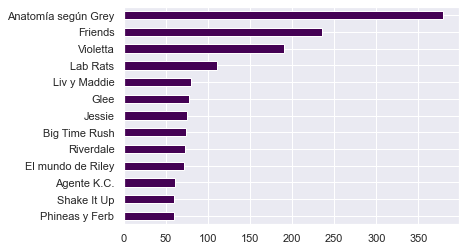

In [63]:
netflix.loc[netflix["tipo"] == 'serie']["nivel1"].value_counts(ascending=True).tail(13).plot.barh(cmap='viridis');

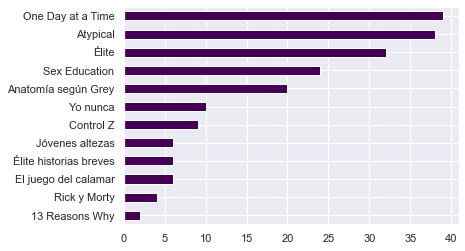

In [70]:
actual = netflix.loc[netflix["anio"] == 2021]
actual.loc[actual["tipo"] == 'serie', "nivel1"].value_counts(ascending=True).tail(14).plot.barh(cmap='viridis');

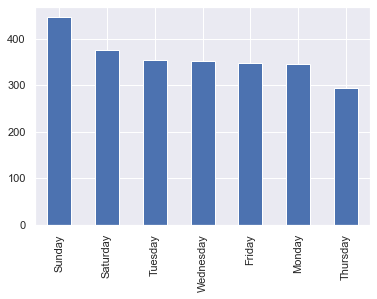

In [71]:
netflix.loc[netflix["tipo"] == "serie", "dia_semana"].value_counts().plot(kind="bar");

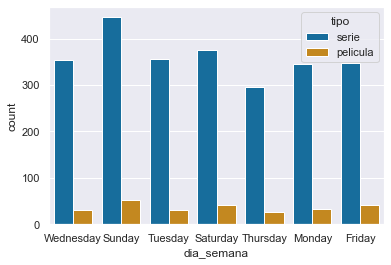

In [72]:
sns.countplot(data=netflix, x='dia_semana', hue='tipo', palette='colorblind');

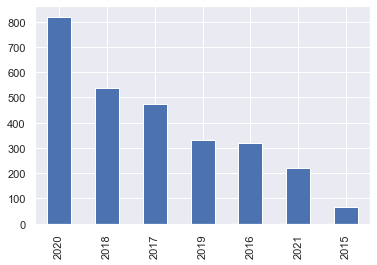

In [74]:
netflix["anio"].value_counts().plot.bar();

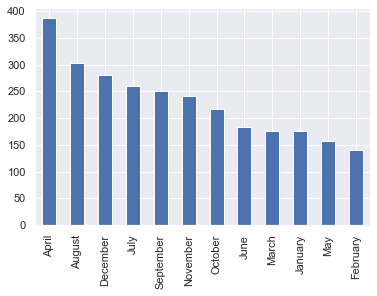

In [75]:
netflix["mes"].value_counts().plot.bar();

<AxesSubplot:>

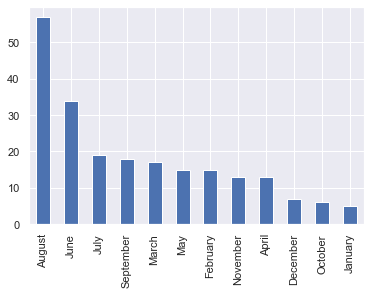

In [76]:
actual["mes"].value_counts().plot(kind="bar")